In [85]:
import pandas as pd
import numpy as np

In [86]:
model_optimum_thresholds = pd.read_csv("../data/processed/model_optimum_thresholds.csv")

data = pd.read_excel("../data/raw/TWINO_task_data_scientist.xlsx",sheet_name="Data")


In [87]:
model_optimum_thresholds

,Model Name,Threshold,Cost,False Negative Count,False Negative Cost,False Positive Count,False Positive Cost,Auto Reject,Auto Approve
0,Random Forest,0.50,24835,933,15861,641,8974,3103,6795
1,XGBoost,0.51,37337,1465,24905,888,12432,2818,7080
2,Logistic Regression,0.51,43367,1711,29087,1020,14280,2704,7194
3,Ensemble,0.50,32892,1304,22168,766,10724,2857,7041


In [88]:
model_optimum_thresholds_melted = model_optimum_thresholds.melt(id_vars="Model Name", var_name="Metric", value_name="Value")


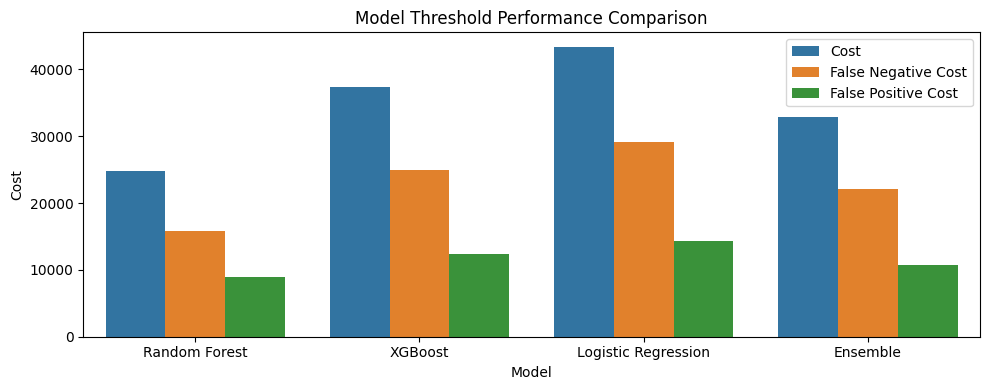

In [89]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

cost_metric_columns= ['Cost', 'False Negative Cost', 'False Positive Cost']
model_optimum_thresholds_filtered = model_optimum_thresholds_melted[model_optimum_thresholds_melted['Metric'].isin(metrics_of_interest)]


plt.figure(figsize=(10, 4))
sns.barplot(x="Model Name", y="Value", hue="Metric", data=model_optimum_thresholds_filtered)
plt.title("Model Threshold Performance Comparison")
plt.ylabel("Cost")
plt.xlabel("Model")
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig("../reports/figures/model_optimum_thresholds.png")
plt.show()


In [90]:
selected_model=model_optimum_thresholds.loc[model_optimum_thresholds["Model Name"]=="Random Forest"]
selected_model['False Negative Cost'].iloc[0]

15861

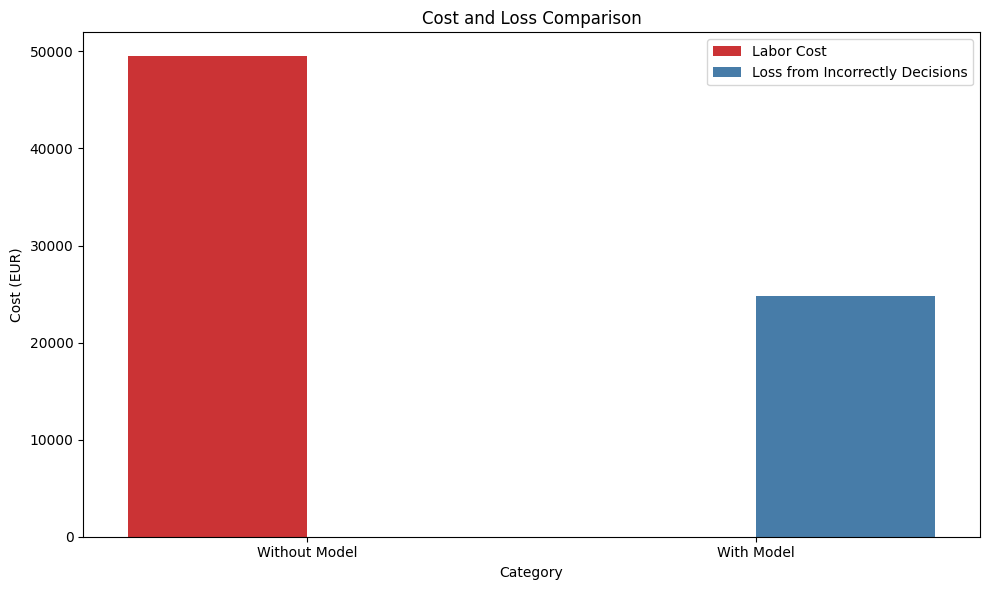

In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example values for selected_model


# Create the DataFrame
total_applications = len(data)
labor_cost = 5
total_labor_cost = total_applications * labor_cost

categories = [
    'Labor Cost',
    'Loss from Incorrectly Decisions'
]
without_model = [total_labor_cost, 0]
with_model = [
    0,
    selected_model["Cost"].iloc[0]
]

cost_analysis_df = pd.DataFrame({
    'Category': categories,
    'Without Model': without_model,
    'With Model': with_model
})

# Melt the DataFrame for seaborn
cost_analysis_melted = cost_analysis_df.melt(id_vars="Category", var_name="Context", value_name="Value")

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Context", y="Value", hue="Category", data=cost_analysis_melted, palette="Set1")
plt.title("Cost and Loss Comparison")
plt.ylabel("Cost (EUR)")
plt.xlabel("Category")
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig("../reports/figures/cost_loss.png")

plt.show()


In [92]:

# Data for tables
baseline_without_model = pd.DataFrame({
    'Metric': ['Total Labor Costs', 'Total Losses from Incorrect Decisions'],
    'Value': [total_labor_cost, 0]
})

baseline_with_model = pd.DataFrame({
    'Metric': ['Estimated Labor Costs', 'Estimated Losses from Incorrect Decisions'],
    'Value': [0, selected_model["Cost"].iloc[0]]
})

# Calculate potential savings
labor_cost_savings = total_labor_cost - 0  
reduction_in_losses = 0 - selected_model["Cost"].iloc[0]  # Assuming no losses without the model

potential_savings = pd.DataFrame({
    'Metric': ['Labor Cost Savings', 'Reduction in Losses'],
    'Amount Saved': [f'{labor_cost_savings} EUR', f'{reduction_in_losses} EUR']
})

# Displaying tables
print("Baseline Analysis - Without the Model")
display(baseline_without_model)

print("\nBaseline Analysis - With the Model")
display(baseline_with_model)

print("\nPotential Savings")
display(potential_savings)


Baseline Analysis - Without the Model


,Metric,Value
0,Total Labor Costs,49490
1,Total Losses from Incorrect Decisions,0



Baseline Analysis - With the Model


,Metric,Value
0,Estimated Labor Costs,0
1,Estimated Losses from Incorrect Decisions,24835



Potential Savings


,Metric,Amount Saved
0,Labor Cost Savings,49490 EUR
1,Reduction in Losses,-24835 EUR
